<a href="https://colab.research.google.com/github/markoutsikou/DWS101-ML/blob/main/ML_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# **ΜΕΡΟΣ Ι - ΛΟΓΙΣΤΙΚΗ ΠΑΛΙΝΔΡΟΜΗΣΗ**






# **Ερώτημα 1**

# Load Dataset

In [220]:
df = pd.read_csv('diabetes.csv')
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Plot Variables

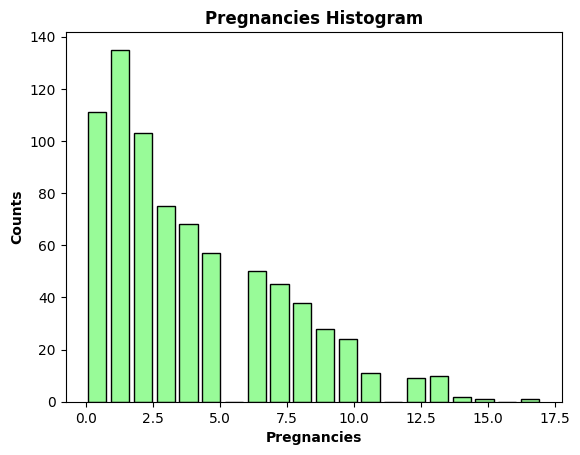

In [221]:
df['Pregnancies'].hist(bins = 20, color = 'palegreen', edgecolor = 'black', rwidth = 0.8, grid = False)
plt.title('Pregnancies Histogram', fontweight = 'bold')
plt.xlabel('Pregnancies', fontweight = 'bold')
plt.ylabel('Counts', fontweight = 'bold')
plt.show()

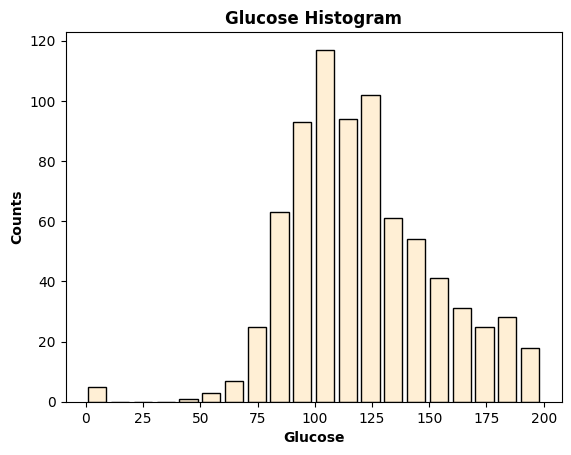

In [222]:
df['Glucose'].hist(bins = 20, color = 'papayawhip', edgecolor = 'black', rwidth = 0.8, grid = False)
plt.title('Glucose Histogram', fontweight = 'bold')
plt.xlabel('Glucose', fontweight = 'bold')
plt.ylabel('Counts', fontweight = 'bold')
plt.show()

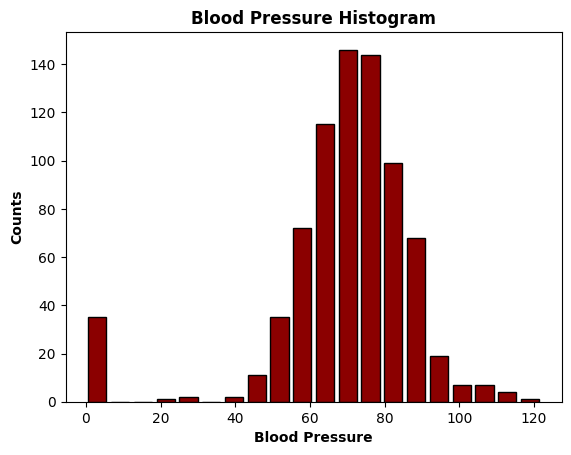

In [223]:
df['BloodPressure'].hist(bins = 20, color = 'darkred', edgecolor = 'black', rwidth = 0.8, grid = False)
plt.title('Blood Pressure Histogram', fontweight = 'bold')
plt.xlabel('Blood Pressure', fontweight = 'bold')
plt.ylabel('Counts', fontweight = 'bold')
plt.show()

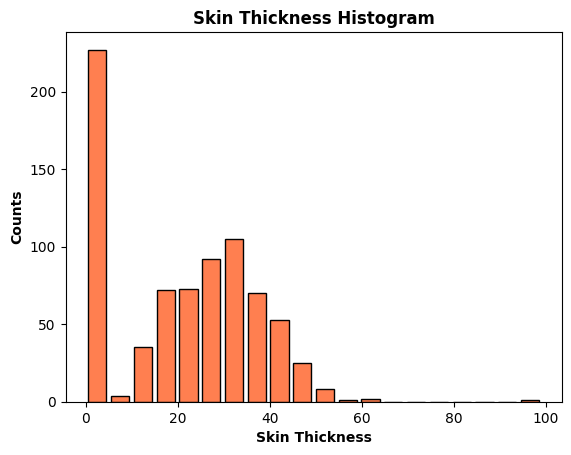

In [224]:
df['SkinThickness'].hist(bins = 20, color = 'coral', edgecolor = 'black', rwidth = 0.8, grid = False)
plt.title('Skin Thickness Histogram', fontweight = 'bold')
plt.xlabel('Skin Thickness', fontweight = 'bold')
plt.ylabel('Counts', fontweight = 'bold')
plt.show()

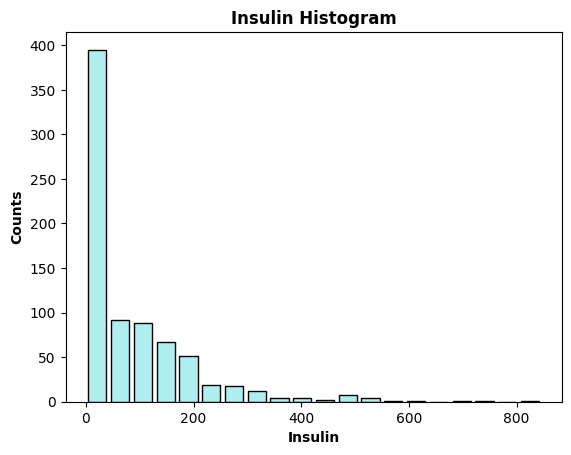

In [225]:
df['Insulin'].hist(bins = 20, color = 'paleturquoise', edgecolor = 'black', rwidth = 0.8, grid = False)
plt.title('Insulin Histogram', fontweight = 'bold')
plt.xlabel('Insulin', fontweight = 'bold')
plt.ylabel('Counts', fontweight = 'bold')
plt.show()

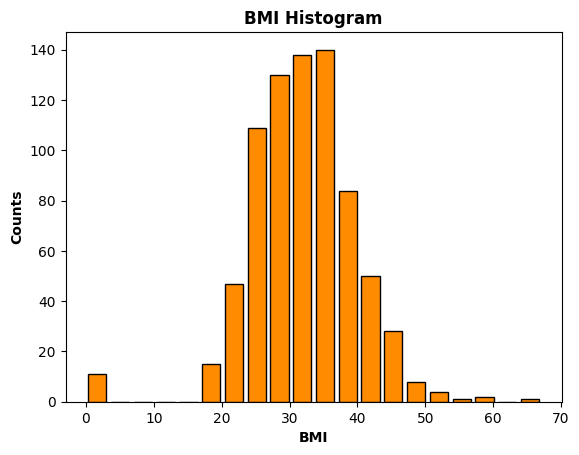

In [226]:
df['BMI'].hist(bins = 20, color = 'darkorange', edgecolor = 'black', rwidth = 0.8, grid = False)
plt.title('BMI Histogram', fontweight = 'bold')
plt.xlabel('BMI', fontweight = 'bold')
plt.ylabel('Counts', fontweight = 'bold')
plt.show()

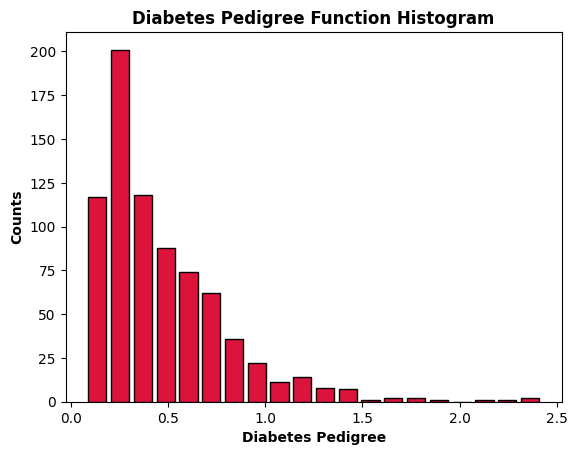

In [227]:
df['DiabetesPedigreeFunction'].hist(bins = 20, color = 'crimson', edgecolor = 'black', rwidth = 0.8, grid = False)
plt.title('Diabetes Pedigree Function Histogram', fontweight = 'bold')
plt.xlabel('Diabetes Pedigree', fontweight = 'bold')
plt.ylabel('Counts', fontweight = 'bold')
plt.show()

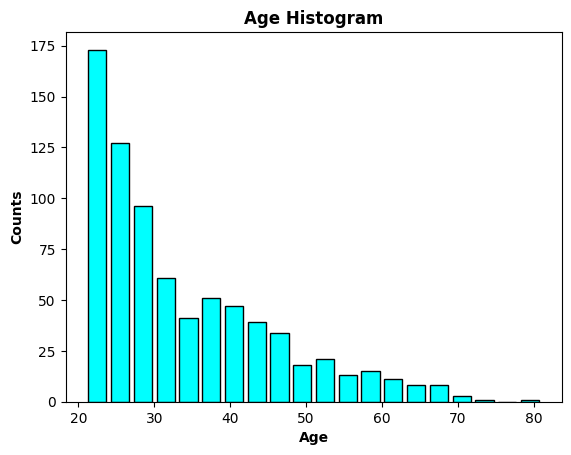

In [228]:
df['Age'].hist(bins = 20, color = 'cyan', edgecolor = 'black', rwidth = 0.8, grid = False)
plt.title('Age Histogram', fontweight = 'bold')
plt.xlabel('Age', fontweight = 'bold')
plt.ylabel('Counts', fontweight = 'bold')
plt.show()

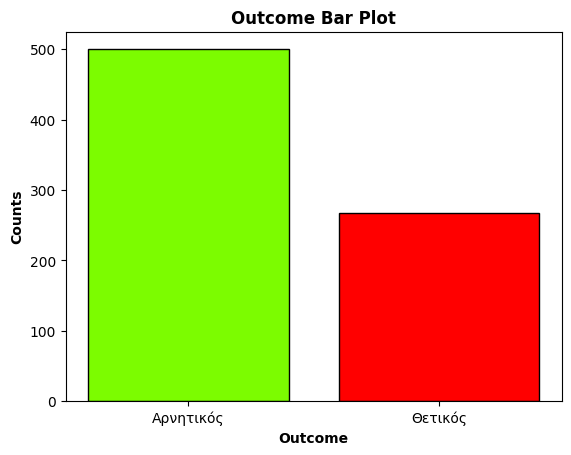

In [229]:
labels = np.array(['Αρνητικός', 'Θετικός'])
counts = df['Outcome'].value_counts()
plt.bar(labels, counts, edgecolor = 'black', width=0.8, color=['lawngreen','red'])
plt.title('Outcome Bar Plot', fontweight = 'bold')
plt.xlabel('Outcome', fontweight = 'bold')
plt.ylabel('Counts', fontweight = 'bold')
plt.show()


# **Ερώτημα 2**
Παρατηρώντας τα αποτελέσματα του ερωτήματος 1 έχουμε:

*   Υπάρχουν πολλές μηδενικές στις μεταβλητές Insuline, Glucose, Blood Pressure, BMI κτλ.
*   Αντίθετα, υπάρχουν και πολύ μεγάλες τιμές, που παραπέμπουν σε ακραίες τιμές (outliers), σε μεταβλητές όπως Pregnancies (max 17) και BMI (max 67.1).

Επομένως, καταλήγουμε στο συμπέρασμα ότι η ποιότητα των δεδομένων μας είναι κακή και ενδεχομένως χρειάζονται κάποιου είδους επεξεργασία.  

# **Ερώτημα 3**
Η μεταβλητή Age ακολουθεί λογαριθμική κατανομή θετικά ασύμμετρη ή ασύμμετρη προς τα δεξιά. Αυτό συμβαίνει γιατί έχουμε μεγαλύτερο πλήθος παρατηρήσεων στις μικρότερες ηλικίες και λιγότερες στις πιο μεγάλες ηλικίες.
Η κατάνομη αυτή δεν είναι καλή για την κατασκευή της συγκεκριμένης εφαρμογής γιατί οι μεγαλύτερες ηλικίες δεν εκπροσωπούνται επαρκώς και μπορεί να οδηγηθούμε σε μεροληπτικό μοντέλο.

# **Ερώτημα 4**


Αρκεί να εξετάσουμε το correlation μεταξύ της μεταβλητής Glucose και του Outcome.

In [230]:
df.corr()['Outcome']

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


Παρότι για να πούμε ότι έχουμε ισχυρή συσχέτιση, καλό είναι να έχουμε συσχέτιση > 0.6, παρατηρούμε ότι η Glucose είναι η μεταβλητή με τη μεγαλύτερη θετική συσχέτιση ως προς το Outcome, δηλαδή την εμφάνιση διαβήτη.

# **Ερώτημα 5**

# Convert DataFrame to Numpy arrays

In [231]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((768, 8), (768,))

# Split Dataset to Train-Test

In [232]:
seed = 0
test_size = 0.1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

print('Train Set:', len(x_train))
print('Test Set:', len(x_test))

Train Set: 537
Test Set: 231


# **Ερώτημα 6**

# Create a Logistic Regression Model

In [233]:
model = LogisticRegression(max_iter=1000, random_state=seed)

# Train model on training set

In [234]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

# Evaluate Model on test set

In [235]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [236]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)
accuracy_train = accuracy_score(y_train, model.predict(x_train))
accuracy_percentage_train = round(accuracy_train*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage}')
print(f'The accuracy of the train is: {accuracy_percentage_train}')

The accuracy of the model is: 77.92
The accuracy of the train is: 76.54


Παρατηρούμε ότι η ακρίβεια (accuracy score) είναι σχεδόν ίδια και στο train test και στο test set. Αυτό σημαίνει ότι το μοντέλο μας εκπαιδεύτηκα καλά, χωρίς να κάνει overfitting.

# **Ερώτημα 7**

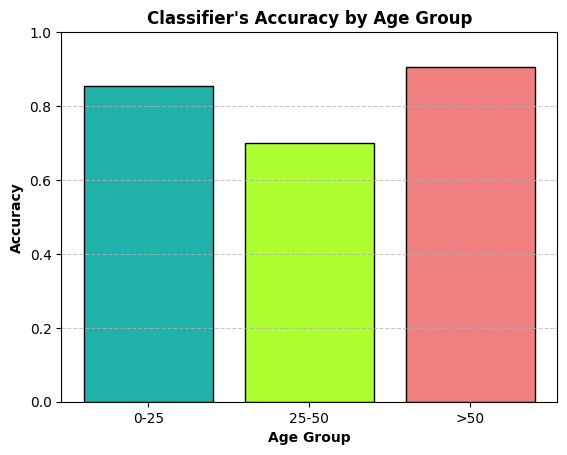

In [237]:
ages_test = x_test[:, -1]

age_groups = {
    "0-25": (ages_test <= 25),
    "25-50": ((ages_test > 25) & (ages_test <= 50)),
    ">50": (ages_test > 50)
}

age_accuracies = {}
for group, condition in age_groups.items():
    indices = np.where(condition)[0]
    if len(indices) > 0:
        acc = accuracy_score(y_test[indices], y_pred[indices])
        age_accuracies[group] = acc

plt.bar(age_accuracies.keys(), age_accuracies.values(), color=["lightseagreen", "greenyellow", "lightcoral"], edgecolor="black")
plt.title("Classifier's Accuracy by Age Group", fontweight = 'bold' )
plt.xlabel("Age Group", fontweight = 'bold')
plt.ylabel("Accuracy", fontweight = 'bold')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Ερώτημα 8**
Κατά τη γνώμη μου, είναι προτιμότερο ο ταξιονομητής να προβλέπει εσφαλμένα ότι ο ασθενής έχει διαβήτη παρά να μην καταφέρει να το προβλέψει. Στην πρώτη περίπτωση ο ασθενής μπορεί να υποβληθεί σε εξετάσεις και να γίνει η σωστή διάγνωση, ενώ στην δεύτερη περίπτωση ο ασθενής μπορεί να μην λάβει την απαραίτητη φροντίδα και να γίνει η διάγνωσή του αρκετά αργότερα.

# **Ερώτημα 9**

# Logistic Regression  Model with Different Seed

In [238]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

accuracy_list = []
sandard_deviation_list = []

for seed in range(0, 10):
  test_size = 0.1

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)
  x_train.shape, y_train.shape, x_test.shape, y_test.shape

  model = LogisticRegression(max_iter=1000, random_state=seed)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  accuracy_list.append(accuracy_score(y_test, y_pred))

mean = np.mean(accuracy_list)
sandard_deviation = np.std(accuracy_list)


sandard_deviation_list.append(sandard_deviation)

print('Train Set:', len(x_train))
print('Test Set:', len(x_test))
print(f'The mean accuracy of the model is: {mean}')
print(f'The accuracy standard deviation of the model is: {sandard_deviation}')

Train Set: 537
Test Set: 231
The mean accuracy of the model is: 0.7727272727272727
The accuracy standard deviation of the model is: 0.018695084746051253


# **Ερώτημα 10**


# MinMax Regularization

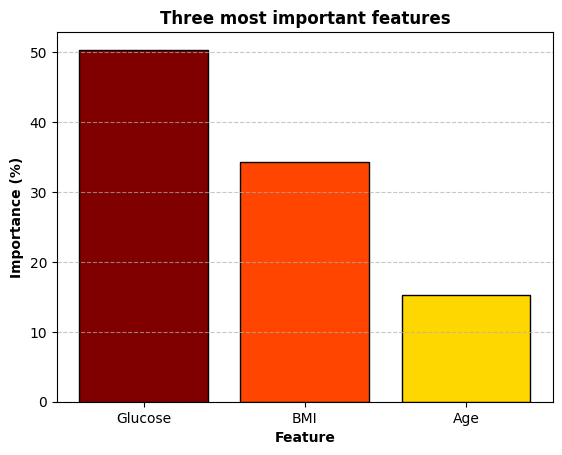

[('Glucose', np.float64(4.340818281424639)),
 ('BMI', np.float64(2.9541081818510064)),
 ('Age', np.float64(1.3182601489327401))]

In [239]:
x = df.drop("Outcome", axis=1).values
y = df["Outcome"].values
features = df.drop("Outcome", axis=1).columns

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.3, random_state=0
)

model_scaled = LogisticRegression(random_state=0, max_iter=1000)
model_scaled.fit(x_train, y_train)

coefficients = model_scaled.coef_[0]

importance = list(zip(features, coefficients))

def abs_sort(item):
  return abs(item[1])

importance_sorted = sorted(importance, key=abs_sort, reverse=True)
top3 = importance_sorted[:3]
imp_values = [abs(x[1]) for x in top3]
total = sum(imp_values)
importance_percent = [(x[0], (abs(x[1]) / total) * 100) for x in top3]

labels = [x[0] for x in importance_percent]
values = [x[1] for x in importance_percent]

plt.bar(labels, values, color=["maroon", "orangered", "gold"], edgecolor="black")
plt.title("Three most important features", fontweight = 'bold')
plt.xlabel("Feature", fontweight = 'bold')
plt.ylabel("Importance (%)", fontweight = 'bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

top3


# **ΜΕΡΟΣ ΙΙ - ΓΡΑΜΜΙΚΗ ΠΑΛΙΝΔΡΟΜΗΣΗ**

# **Ερώτημα 1**

# Load Dataset - Convert DataFrame to Numpy arrays - Split Dataset

In [240]:
df = pd.read_csv('diabetes.csv')
input_df = df[['Pregnancies','BloodPressure','BMI','Age']]
targets_df = df['Glucose']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 4), (537,), (231, 4), (231,))

# **Ερώτημα 2**

# Linear Regression

In [241]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 929.8883492746899
Mean Absolute Error: 23.599990462075155


Επειδή το συγκεκριμένο Dataset έχει αρκετές ακραίες τιμές, η καταλληλότερη μετρική θα είναι η Mean Absolute Error, η οποία υπολογίζει τον μέσο όρο των διαφορών μεταξύ πραγματικών και προβλεπόμενων τιμών.

# **Ερώτημα 3**

# Lasso Regression

In [242]:
x = df[["Pregnancies", "BloodPressure", "BMI", "Age"]].values
y = df["Glucose"].values

x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.3, random_state=0
)

alphas = [0.2, 0.4, 0.6, 0.8, 1.0]
results = []

for a in alphas:
    model = Lasso(alpha=a, random_state=0, max_iter=10000)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    mae = mean_absolute_error(y_val, y_pred)
    results.append((a, mae))

lasso_results = pd.DataFrame(results, columns=["Alpha", "MAE"])
print("📊 Αποτελέσματα Lasso Regression:")
print(lasso_results)

📊 Αποτελέσματα Lasso Regression:
   Alpha        MAE
0    0.2  23.594203
1    0.4  23.588415
2    0.6  23.582629
3    0.8  23.576843
4    1.0  23.571058


# **Ερώτημα 4**

# Νέα ενότητα